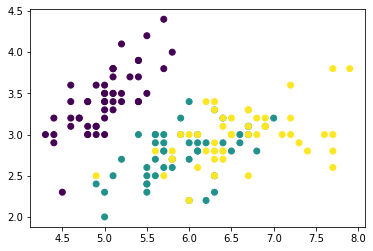

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


(150, 2)


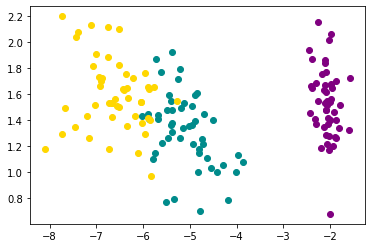

In [32]:
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None

    def transform(self, X, y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T)
        mean_t = np.mean(X, axis=0)

        ##### within scatter
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items) - 1)

        ##### between scatter
        ## option 1
        scatter_b = scatter_t - scatter_w
        ## option 2
        # scatter_b = 0
        # for i in range(num_classes):
        #     class_items = np.flatnonzero(y == unique_classes[i])
        #     tmp = (mean_t - np.mean(X[class_items], axis=0))[..., np.newaxis]
        #     scatter_b = scatter_w + tmp @ tmp.T * len(class_items)

        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        pc = X.dot(eig_vectors[:, ::-1][:, :self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:, 0], pc[:, 1])
            else:
                colors = ['purple', 'darkcyan', 'gold']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y == label)]
                    plt.scatter(class_data[:, 0], class_data[:, 1], c=color)
            plt.show()
        return pc

LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X, y)

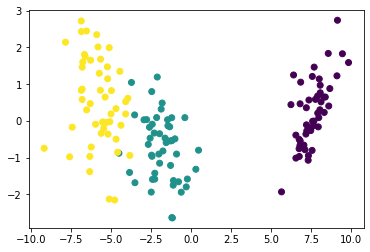

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:,0],X_lda[:,1],c=y)
plt.show()